<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-11-09 10:00:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-11-09 10:00:57 (59.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



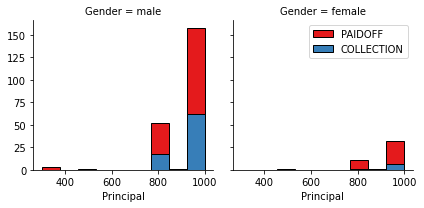

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

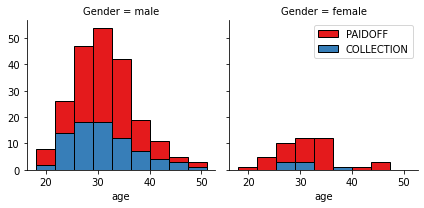

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

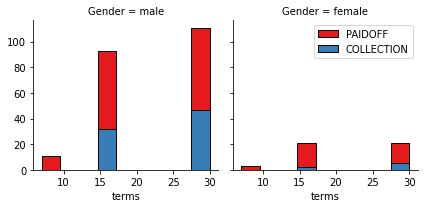

In [10]:
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


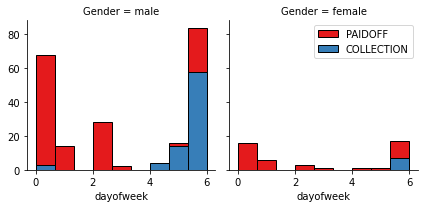

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
Feature.shape

(346, 8)

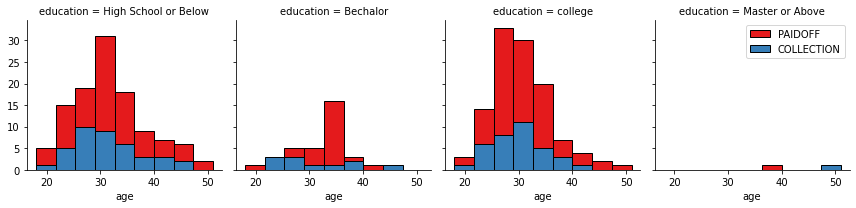

In [19]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=4)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Feature Selection


Let's define feature sets, X:


In [20]:
X = Feature
print ('X size:',X.shape)
X[0:5]

X size: (346, 8)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [21]:
y = df['loan_status'].values
print ('Y size:',y.shape)
y[0:5]

Y size: (346,)


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [23]:
# Train Test Split to test several values of k and then used the best one
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


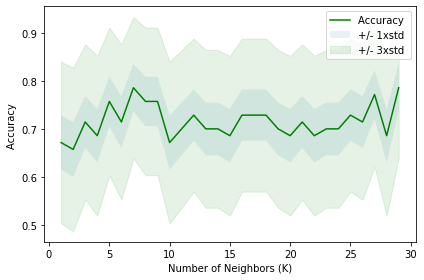

The best accuracy was with 0.7857142857142857 with k= 7


In [24]:
# Research of the best value of k, based on accuracy score of test dataset (from the train set split) & predictions
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [25]:
# Prediction with the best value of k : 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

# Prediction
yhat = neigh.predict(X_test)
print ('Prediction :',yhat[0:5])
print ('Test :',y_test[0:5])

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

from sklearn.metrics import classification_report, confusion_matrix
# Evaluation with split train dataset
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
cnf_matrix

Prediction : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Test : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


array([[ 6,  9],
       [ 6, 49]])

# Decision Tree


In [26]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

# Modeling
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
# Prediction
predTree = loanTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']


In [28]:
# Evaluation with split train dataset
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

from sklearn.metrics import classification_report, confusion_matrix
# Evaluation with split train dataset
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree)
cnf_matrix

DecisionTrees's Accuracy:  0.6538461538461539


array([[13, 14],
       [22, 55]])

# Support Vector Machine


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Modeling
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [30]:
# Prediction
yhat = clf.predict(X_test)
print ('Pred :',yhat [0:5])
print ('Test :',y_test[0:5])

Pred : ['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Test : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Evaluation with split train dataset
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

from sklearn.metrics import f1_score
print ('temp F1-score :',f1_score(y_test, yhat, average='weighted')) 

from sklearn.metrics import jaccard_score
#print ('Jaccard-score :',jaccard_score(y_test, yhat,pos_label=2)) ... not working with Python 3.8 ?? !!
Jaccard_score = (cnf_matrix[1, 1])/(cnf_matrix.sum()-cnf_matrix[0, 0]) # jaccard index calculated using the defiition and the terms from the confusion matix
print ('temp Jaccard-score :',Jaccard_score) 

print (classification_report(y_test, yhat))
cnf_matrix

temp F1-score : 0.7275882012724117
temp Jaccard-score : 0.7272727272727273
              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



array([[ 4, 11],
       [ 7, 48]])

# Logistic Regression


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Modeling
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
# Prediction
yhat = LR_model.predict(X_test)
yhat_prob = LR_model.predict_proba(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Evaluation with split train dataset
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

from sklearn.metrics import f1_score
print ('temp F1-score :',f1_score(y_test, yhat, average='weighted')) 

from sklearn.metrics import jaccard_score
#print ('Jaccard-score :',jaccard_score(y_test, yhat,pos_label=2)) ... not working with Python 3.8 ?? !!
Jaccard_score = (cnf_matrix[1, 1])/(cnf_matrix.sum()-cnf_matrix[0, 0]) # jaccard index calculated using the defiition and the terms from the confusion matix
print ('temp Jaccard-score :',Jaccard_score) 

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
print ('temp LogLoss :',log_loss) #strange result regarding logloss ... code & formula comes from the previous course and seem to be ok ...
print ('strange result regarding logloss ... code & formula comes from the previous course and seem to be ok ...')

print (classification_report(y_test, yhat))
cnf_matrix

temp F1-score : 0.6670522459996144
temp Jaccard-score : 0.6764705882352942
temp LogLoss : <function log_loss at 0x7fc718ebee50>
strange result regarding logloss ... code & formula comes from the previous course and seem to be ok ...
              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



array([[ 2, 13],
       [ 9, 46]])

# Model Evaluation using Test set


In [35]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [36]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-11-09 10:01:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-11-09 10:01:19 (47.7 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [37]:
test_df = pd.read_csv('loan_test.csv')
print ('Load Test set:',test_df.shape)
test_df.head()

#Test set preparation & pre-processing, similar to Train set pre-processing previoulsy done
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test_final = test_Feature
X_test_final= preprocessing.StandardScaler().fit(X_test_final).transform(X_test_final)

print ('Test set:',X_test_final.shape)
test_Feature.head()

Load Test set: (54, 10)
Test set: (54, 8)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


########## kNN method ##########
Prediction : ['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'COLLECTION']
Test : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
              precision    recall  f1-score   support

  COLLECTION       0.25      0.14      0.18        14
     PAIDOFF       0.74      0.85      0.79        40

    accuracy                           0.67        54
   macro avg       0.49      0.50      0.49        54
weighted avg       0.61      0.67      0.63        54

Jaccard-score : 0.6538461538461539
F1-score : 0.6328400281888654
####################


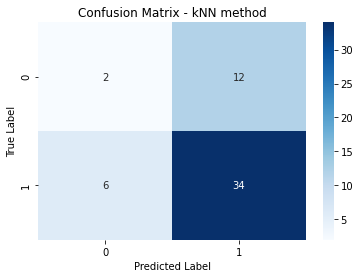

In [38]:
#KNN method - Evaluation with Test set

# ------- prediction & test array ------- 
ypred_final = neigh.predict(X_test_final)
y_test_final = test_df['loan_status'].values
print ('########## kNN method ##########')
print ('Prediction :',ypred_final[0:5])
print ('Test :',y_test_final[0:5])


# ------- Evaluation with Test set ------- 

# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test_final, ypred_final)

#plot confusion matrix
ax = sns.heatmap(cnf_matrix, cmap='Blues',annot=True)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.title('Confusion Matrix - kNN method')

print (classification_report(y_test_final, ypred_final))

#print ('Jaccard-score :',jaccard_score(y_test, yhat,pos_label=2)) ... not working with Python 3.8 ?? !!
kNN_Jaccard_score = (cnf_matrix[1, 1])/(cnf_matrix.sum()-cnf_matrix[0, 0]) # jaccard index calculated using the defiition and the terms from the confusion matix
kNN_f1_score=f1_score(y_test_final, ypred_final, average='weighted')

print ('Jaccard-score :',kNN_Jaccard_score)
print ('F1-score :',kNN_f1_score)
print ('####################')

########## Decision Tree method ##########
Prediction : ['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
Test : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
              precision    recall  f1-score   support

  COLLECTION       0.56      0.64      0.60        14
     PAIDOFF       0.87      0.82      0.85        40

    accuracy                           0.78        54
   macro avg       0.72      0.73      0.72        54
weighted avg       0.79      0.78      0.78        54

Jaccard-score : 0.7333333333333333
F1-score : 0.7823361823361823
####################


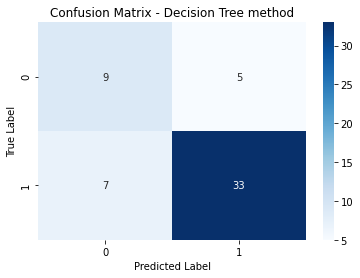

In [39]:
#Decision Tree method - Evaluation with Test set

# ------- prediction & test array -------
ypred_final = loanTree.predict(X_test_final)
y_test_final = test_df['loan_status'].values
print ('########## Decision Tree method ##########')
print ('Prediction :',ypred_final[0:5])
print ('Test :',y_test_final[0:5])


# ------- Evaluation with Test set ------- 

# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test_final, ypred_final)

#plot confusion matrix
ax = sns.heatmap(cnf_matrix, cmap='Blues',annot=True)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.title('Confusion Matrix - Decision Tree method')

print (classification_report(y_test_final, ypred_final))
#print ('Jaccard-score :',jaccard_score(y_test, yhat,pos_label=2)) ... not working with Python 3.8 ?? !!
DT_Jaccard_score = (cnf_matrix[1, 1])/(cnf_matrix.sum()-cnf_matrix[0, 0]) # jaccard index calculated using the defiition and the terms from the confusion matix
DT_f1_score=f1_score(y_test_final, ypred_final, average='weighted')

print ('Jaccard-score :',DT_Jaccard_score)
print ('F1-score :',DT_f1_score)
print ('####################')

########## SVM method ##########
Prediction : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
Test : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
              precision    recall  f1-score   support

  COLLECTION       0.80      0.29      0.42        14
     PAIDOFF       0.80      0.97      0.88        40

    accuracy                           0.80        54
   macro avg       0.80      0.63      0.65        54
weighted avg       0.80      0.80      0.76        54

Jaccard-score : 0.78
F1-score : 0.7583503077293734
####################


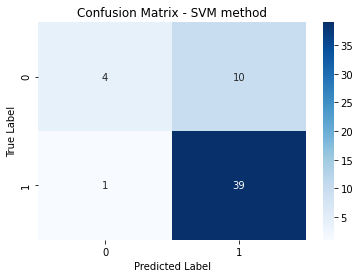

In [40]:
#SVM method - Evaluation with Test set

# ------- prediction & test array -------
ypred_final = clf.predict(X_test_final)
y_test_final = test_df['loan_status'].values
print ('########## SVM method ##########')
print ('Prediction :',ypred_final[0:5])
print ('Test :',y_test_final[0:5])


# ------- Evaluation with Test set ------- 

# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test_final, ypred_final)

#plot confusion matrix
ax = sns.heatmap(cnf_matrix, cmap='Blues',annot=True)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.title('Confusion Matrix - SVM method')

print (classification_report(y_test_final, ypred_final))

#print ('Jaccard-score :',jaccard_score(y_test, yhat,pos_label=2)) ... not working with Python 3.8 ?? !!
SVM_Jaccard_score = (cnf_matrix[1, 1])/(cnf_matrix.sum()-cnf_matrix[0, 0]) # jaccard index calculated using the defiition and the terms from the confusion matix
SVM_f1_score=f1_score(y_test_final, ypred_final, average='weighted')

print ('Jaccard-score :',SVM_Jaccard_score)
print ('F1-score :',SVM_f1_score)
print ('####################')

########## Logistic Regression method ##########
Prediction : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
Test : ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
              precision    recall  f1-score   support

  COLLECTION       0.50      0.07      0.12        14
     PAIDOFF       0.75      0.97      0.85        40

    accuracy                           0.74        54
   macro avg       0.62      0.52      0.49        54
weighted avg       0.69      0.74      0.66        54

Jaccard-score : 0.7358490566037735
F1-score : 0.6604267310789049
LogLoss : 0.5672153379912981
####################


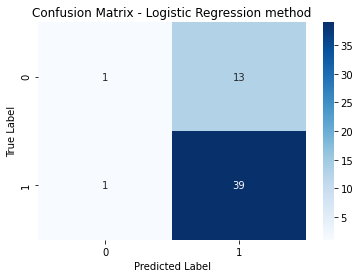

In [41]:
#Logistic Regression method - Evaluation with Test set

# ------- prediction & test array -------
ypred_final = LR_model.predict(X_test_final)
ypred_prob_final = LR_model.predict_proba(X_test_final)
y_test_final = test_df['loan_status'].values
print ('########## Logistic Regression method ##########')
print ('Prediction :',ypred_final[0:5])
print ('Test :',y_test_final[0:5])

# ------- Evaluation with Test set ------- 

# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test_final, ypred_final)

#plot confusion matrix
ax = sns.heatmap(cnf_matrix, cmap='Blues',annot=True)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.title('Confusion Matrix - Logistic Regression method')

print (classification_report(y_test_final, ypred_final))

#print ('Jaccard-score :',jaccard_score(y_test, yhat,pos_label=2)) ... not working with Python 3.8 ?? !!
LR_Jaccard_score = (cnf_matrix[1, 1])/(cnf_matrix.sum()-cnf_matrix[0, 0]) # jaccard index calculated using the defiition and the terms from the confusion matix
LR_f1_score=f1_score(y_test_final, ypred_final, average='weighted')
LR_log_loss=log_loss(y_test_final, ypred_prob_final)

print ('Jaccard-score :',LR_Jaccard_score)
print ('F1-score :',LR_f1_score)
print ('LogLoss :',LR_log_loss)
print ('####################')

In [43]:
print ('########## Evaluation metrics ##########')
print (' ')
print ('----- kNN method -----')
print ('Jaccard-score :',kNN_Jaccard_score)
print ('F1-score :',kNN_f1_score)
print ('----------')
print (' ')
print ('----- Decision Tree method -----')
print ('Jaccard-score :',DT_Jaccard_score)
print ('F1-score :',DT_f1_score)
print ('----------')
print (' ')
print ('----- SVM method -----')
print ('Jaccard-score :',SVM_Jaccard_score)
print ('F1-score :',SVM_f1_score)
print ('----------')
print (' ')
print ('----- Logistic Regression method -----')
print ('Jaccard-score :',LR_Jaccard_score)
print ('F1-score :',LR_f1_score)
print ('LogLoss :',LR_log_loss) #strange result regarding logloss ... code & formula comes from the previous course and seem to be ok ...
print ('----------')
print (' ')
print ('####################')

########## Evaluation metrics ##########
 
----- kNN method -----
Jaccard-score : 0.6538461538461539
F1-score : 0.6328400281888654
----------
 
----- Decision Tree method -----
Jaccard-score : 0.7333333333333333
F1-score : 0.7823361823361823
----------
 
----- SVM method -----
Jaccard-score : 0.78
F1-score : 0.7583503077293734
----------
 
----- Logistic Regression method -----
Jaccard-score : 0.7358490566037735
F1-score : 0.6604267310789049
LogLoss : 0.5672153379912981
----------
 
####################


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
